## PREDICCION DE MOROSIDAD

In [10]:
import pandas as pd 

Kaggle5 a lo mejor lo podemos juntar con el que tengo para tener mejores resultados pero...

In [11]:
kaggle5=pd.read_csv('./kaggle5/Bank_Personal_Loan_Modelling.csv', sep= ';')
kaggle5.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,"1,60",1,0,0,1,0,0,0
1,2,45,19,34,90089,3,"1,50",1,0,0,1,0,0,0
2,3,39,15,11,94720,1,"1,00",1,0,0,0,0,0,0
3,4,35,9,100,94112,1,"2,70",2,0,0,0,0,0,0
4,5,35,8,45,91330,4,"1,00",2,0,0,0,0,0,1


El de Alberto

In [12]:
df=pd.read_csv('./5k_alberto/loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


En primer lugar haremos un anilisis de que informacion contiene el dataset


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [14]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


Voy a bajar un poco los montos de dinero, diviendo las columnas asociadas con dinero por 100

In [15]:
columns_to_divide = [' income_annum', ' loan_amount', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']

# Dividir las columnas por 100
df[columns_to_divide] /= 100

In [16]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,96000.0,299000.0,12,778,24000.0,176000.0,227000.0,80000.0,Approved
1,2,0,Not Graduate,Yes,41000.0,122000.0,8,417,27000.0,22000.0,88000.0,33000.0,Rejected
2,3,3,Graduate,No,91000.0,297000.0,20,506,71000.0,45000.0,333000.0,128000.0,Rejected
3,4,3,Graduate,No,82000.0,307000.0,8,467,182000.0,33000.0,233000.0,79000.0,Rejected
4,5,5,Not Graduate,Yes,98000.0,242000.0,20,382,124000.0,82000.0,294000.0,50000.0,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,10000.0,23000.0,12,317,28000.0,5000.0,33000.0,8000.0,Rejected
4265,4266,0,Not Graduate,Yes,33000.0,113000.0,20,559,42000.0,29000.0,110000.0,19000.0,Approved
4266,4267,2,Not Graduate,No,65000.0,239000.0,18,457,12000.0,124000.0,181000.0,73000.0,Rejected
4267,4268,1,Not Graduate,No,41000.0,128000.0,8,780,82000.0,7000.0,141000.0,58000.0,Approved


In [17]:
df[' loan_status'].value_counts()

 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [18]:
df[' education'].value_counts()

 education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [19]:
df[' loan_status']=df[' loan_status'].apply(lambda x: 1 if x == " Approved" else 0)

In [20]:
df[' education']=df[' education'].apply(lambda x: 1 if x == " Graduate" else 0)

In [21]:
df[' self_employed']=df[' self_employed'].apply(lambda x: 1 if x == " Yes" else 0)

In [22]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,96000.0,299000.0,12,778,24000.0,176000.0,227000.0,80000.0,1
1,2,0,0,1,41000.0,122000.0,8,417,27000.0,22000.0,88000.0,33000.0,0
2,3,3,1,0,91000.0,297000.0,20,506,71000.0,45000.0,333000.0,128000.0,0
3,4,3,1,0,82000.0,307000.0,8,467,182000.0,33000.0,233000.0,79000.0,0
4,5,5,0,1,98000.0,242000.0,20,382,124000.0,82000.0,294000.0,50000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1,1,10000.0,23000.0,12,317,28000.0,5000.0,33000.0,8000.0,0
4265,4266,0,0,1,33000.0,113000.0,20,559,42000.0,29000.0,110000.0,19000.0,1
4266,4267,2,0,0,65000.0,239000.0,18,457,12000.0,124000.0,181000.0,73000.0,0
4267,4268,1,0,0,41000.0,128000.0,8,780,82000.0,7000.0,141000.0,58000.0,1


<Axes: >

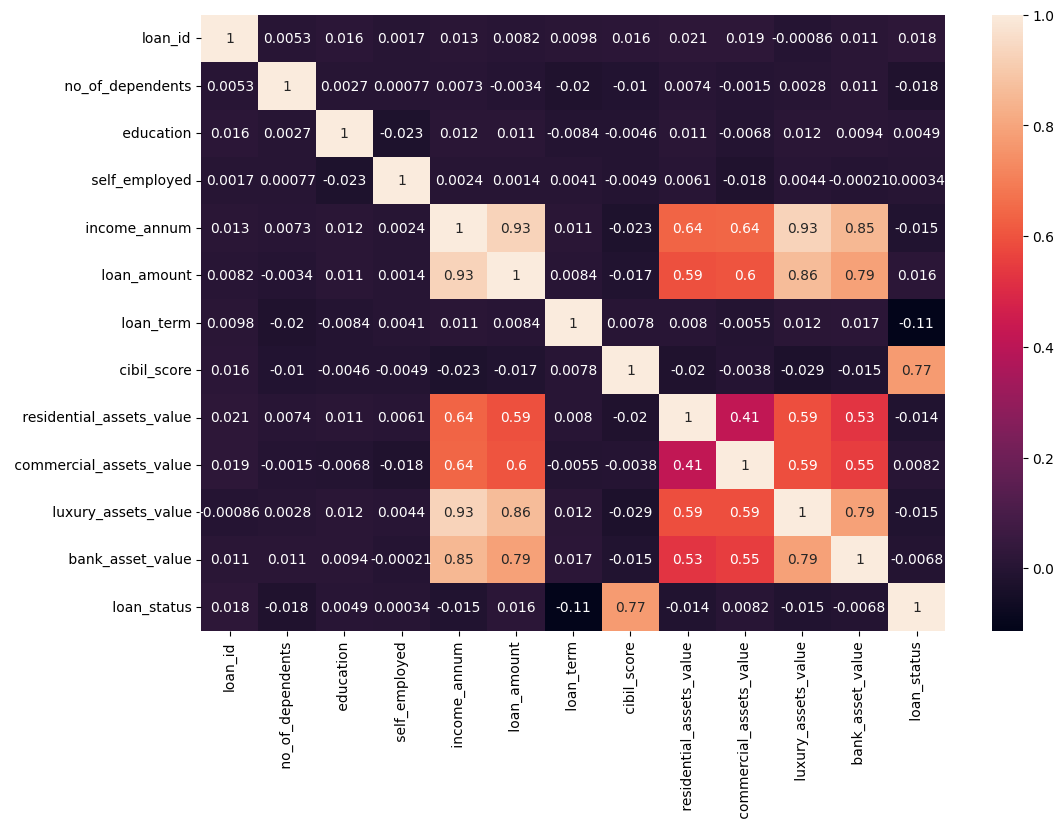

In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

NORMALIZAMOS LOS DATOS

In [24]:
X= df.iloc[:,0:-1]
y= df.iloc[:,-1]


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

PROBAMOS CON LOGISTICREGRESSION

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

logistic_regression = LogisticRegression()

In [28]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

In [29]:
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


c:\Users\corre\anaconda3\envs\eda_nv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\corre\anaconda3\envs\eda_nv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

c:\Users\corre\anaconda3\envs\eda_nv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\corre\anaconda3\envs\eda_nv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [30]:
print("Mejores parámetros:", grid_search.best_params_)
best_model = grid_search.best_estimator_
print("Mejores modelo:", best_model)

Mejores parámetros: {'C': 1, 'penalty': 'l2'}
Mejores modelo: LogisticRegression(C=1)


In [31]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.7447306791569087


In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[144, 174],
       [ 44, 492]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.45      0.57       318
           1       0.74      0.92      0.82       536

    accuracy                           0.74       854
   macro avg       0.75      0.69      0.69       854
weighted avg       0.75      0.74      0.73       854



KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [35]:
knn_classifier = KNeighborsClassifier()

# Define el espacio de búsqueda de hiperparámetros
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [36]:
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [37]:
print("Mejores parámetros:", grid_search_knn.best_params_)
best_model = grid_search_knn.best_estimator_
print("Mejores modelo:", best_model)

Mejores parámetros: {'n_neighbors': 9, 'weights': 'uniform'}
Mejores modelo: KNeighborsClassifier(n_neighbors=9)


In [38]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.5749414519906323


In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[ 74, 244],
       [119, 417]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.23      0.29       318
           1       0.63      0.78      0.70       536

    accuracy                           0.57       854
   macro avg       0.51      0.51      0.49       854
weighted avg       0.54      0.57      0.55       854



DECISION TREE

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

tree_classifier = DecisionTreeClassifier()

param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15]
}

In [42]:
grid_search_tree = GridSearchCV(tree_classifier, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15]},
             scoring='accuracy')

In [43]:
print("Mejores parámetros:", grid_search_tree.best_params_)
best_model = grid_search_tree.best_estimator_
print("Mejores modelo:", best_model)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': None}
Mejores modelo: DecisionTreeClassifier(criterion='entropy')


In [44]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9847775175644028


In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[312,   6],
       [  7, 529]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



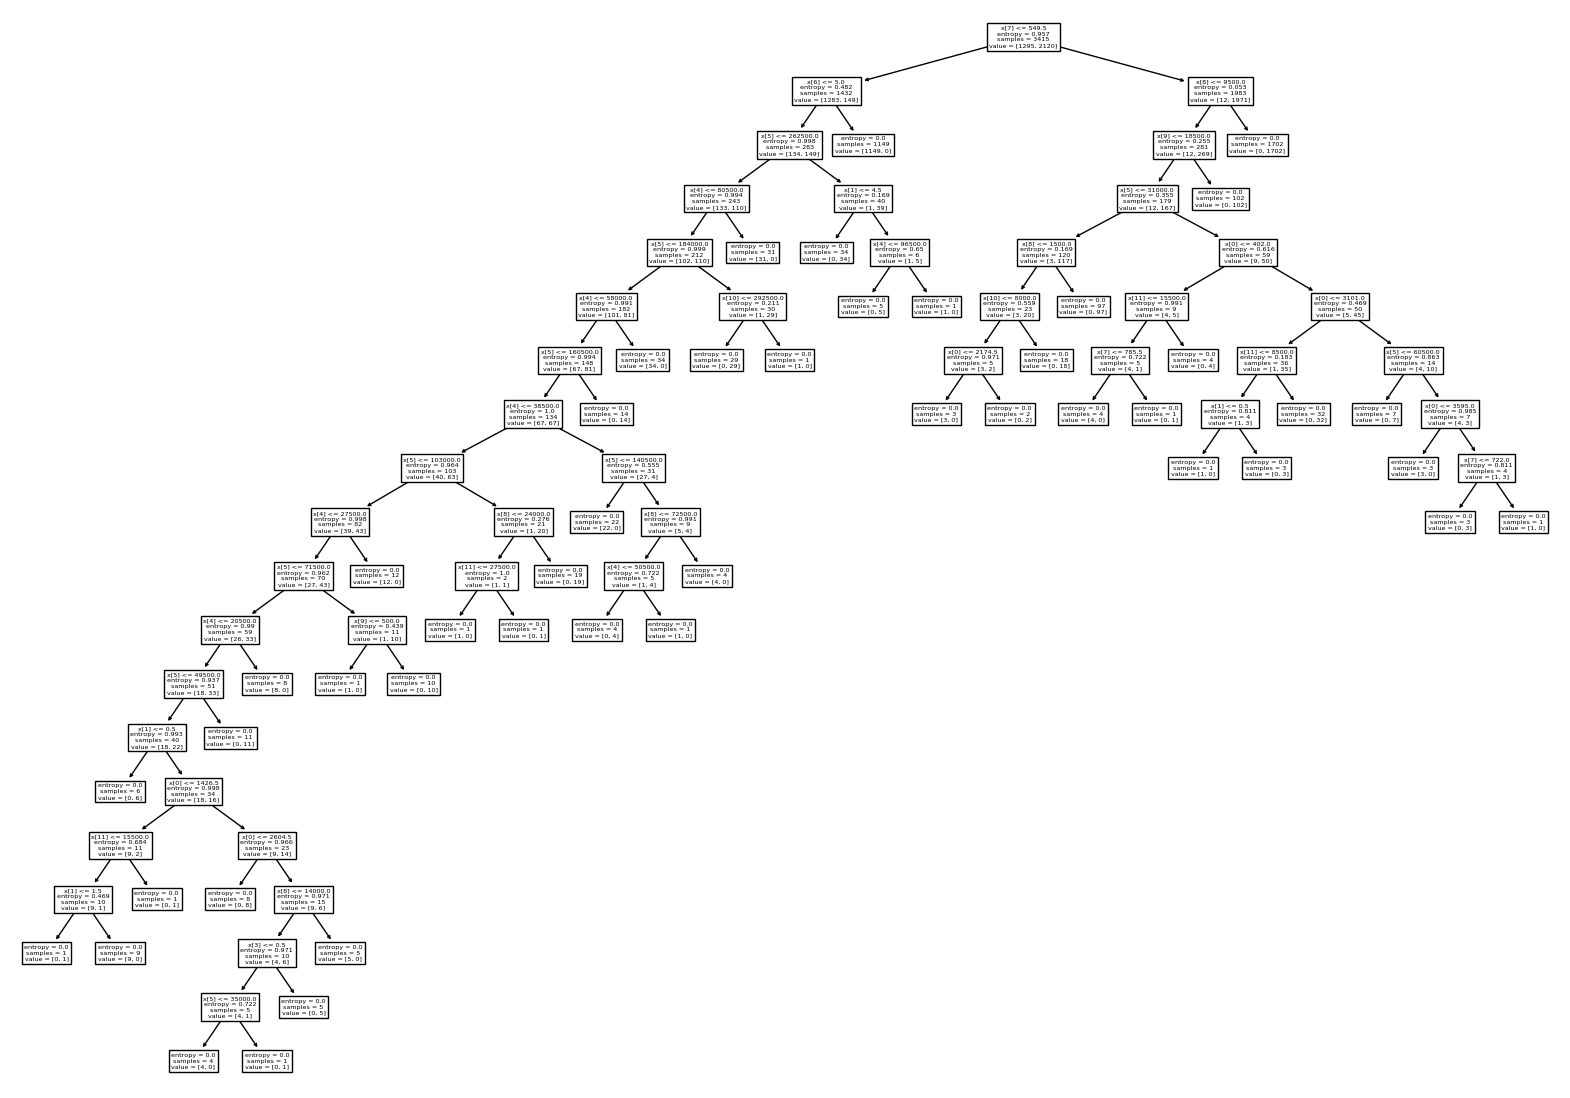

In [47]:
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
import sklearn

plt.figure(figsize=(20,14))
sklearn.tree.plot_tree(best_model);


In [48]:
best_model.feature_importances_

array([0.00889678, 0.00506981, 0.        , 0.00186552, 0.03462331,
       0.03672892, 0.12458712, 0.7588145 , 0.01697559, 0.00393311,
       0.00437916, 0.00412618])

In [49]:
best_model.feature_names_in_

array(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'], dtype=object)

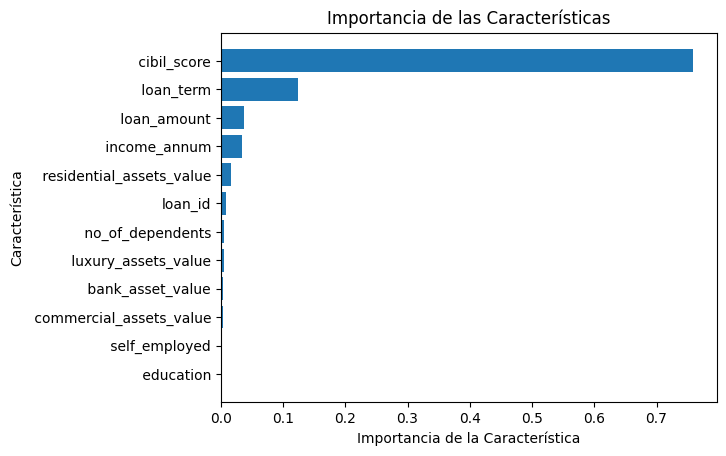

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Supongamos que best_model es tu modelo entrenado
# Reemplaza esto con tu código actual para entrenar el modelo
# best_model = ...

# Obtén las importancias de las características
feature_importances = best_model.feature_importances_

# Obtén los nombres de las características
feature_names = best_model.feature_names_in_

# Ordena las características por su importancia
sorted_idx = np.argsort(feature_importances)

# Crea un gráfico de barras horizontales
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])

plt.xlabel('Importancia de la Característica')
plt.ylabel('Característica')
plt.title('Importancia de las Características')

plt.show()


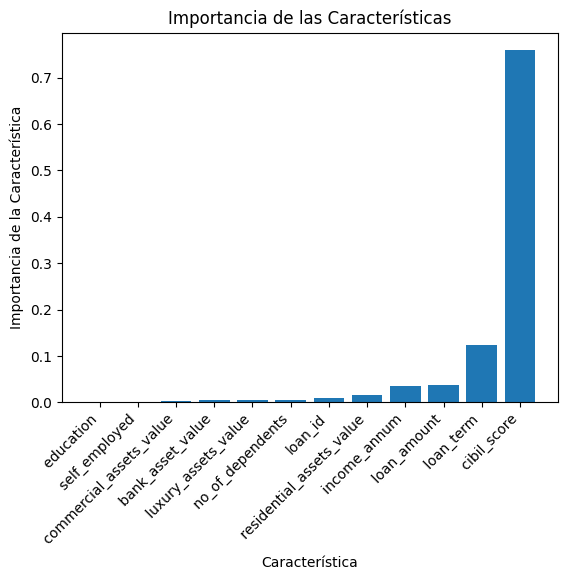

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Supongamos que best_model es tu modelo entrenado
# Reemplaza esto con tu código actual para entrenar el modelo
# best_model = ...

# Obtén las importancias de las características
feature_importances = best_model.feature_importances_

# Obtén los nombres de las características
feature_names = best_model.feature_names_in_

# Ordena las características por su importancia
sorted_idx = np.argsort(feature_importances)

# Crea un gráfico de barras verticales
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.xticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx], rotation=45, ha='right')

plt.ylabel('Importancia de la Característica')
plt.xlabel('Característica')
plt.title('Importancia de las Características')

plt.show()


RANDOM FOREST

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

rf_classifier = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [138]:
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [139]:
print("Mejores parámetros:", grid_search_tree.best_params_)
best_model = grid_search_rf.best_estimator_
print("Mejores modelo:", best_model)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 15}
Mejores modelo: RandomForestClassifier()


In [140]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.977751756440281


In [141]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[308,  10],
       [  9, 527]], dtype=int64)

In [142]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



ADABOOST

In [143]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

adaboost_classifier = AdaBoostClassifier()

param_grid_adaboost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

In [144]:
grid_search_adaboost = GridSearchCV(adaboost_classifier, param_grid_adaboost, cv=5, scoring='accuracy')
grid_search_adaboost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [145]:
print("Mejores parámetros:", grid_search_tree.best_params_)
best_model = grid_search_adaboost.best_estimator_
print("Mejores modelo:", best_model)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 15}
Mejores modelo: AdaBoostClassifier(n_estimators=150)


In [146]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9707259953161592


In [147]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[304,  14],
       [ 11, 525]], dtype=int64)

In [148]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       318
           1       0.97      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



GRADIENTBOOSTING

In [161]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

gradboost_classifier = GradientBoostingClassifier()

param_grid_gradboost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    
}

In [162]:
grid_search_gradboost = GridSearchCV(gradboost_classifier, param_grid_gradboost, cv=5, scoring='accuracy')
grid_search_gradboost.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [163]:
print("Mejores parámetros:", grid_search_tree.best_params_)
best_model = grid_search_gradboost.best_estimator_
print("Mejores modelo:", best_model)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 15}
Mejores modelo: GradientBoostingClassifier(max_depth=5)


In [164]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9859484777517564


In [165]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[311,   7],
       [  5, 531]], dtype=int64)

In [166]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       318
           1       0.99      0.99      0.99       536

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.98       854
weighted avg       0.99      0.99      0.99       854



XGBOOST

In [154]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pandas as pd


xgb_classifier = xgb.XGBClassifier(n_jobs=-1)

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100],
    'max_depth': [3, 5]
    
}

In [155]:
grid_search_xgb = GridSearchCV(xgb_classifier, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [156]:
print("Mejores parámetros:", grid_search_tree.best_params_)
best_model = grid_search_xgb.best_estimator_
print("Mejores modelo:", best_model)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 15}
Mejores modelo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)


In [157]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9789227166276346


In [158]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[309,   9],
       [  9, 527]], dtype=int64)

In [159]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



___________

Voy a volver a examinar kaggle5

In [6]:
kaggle5.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,"1,60",1,0,0,1,0,0,0
1,2,45,19,34,90089,3,"1,50",1,0,0,1,0,0,0
2,3,39,15,11,94720,1,"1,00",1,0,0,0,0,0,0
3,4,35,9,100,94112,1,"2,70",2,0,0,0,0,0,0
4,5,35,8,45,91330,4,"1,00",2,0,0,0,0,0,1


In [8]:
kaggle5['CCAvg'] = kaggle5['CCAvg'].str.replace(',', '.')

<Axes: >

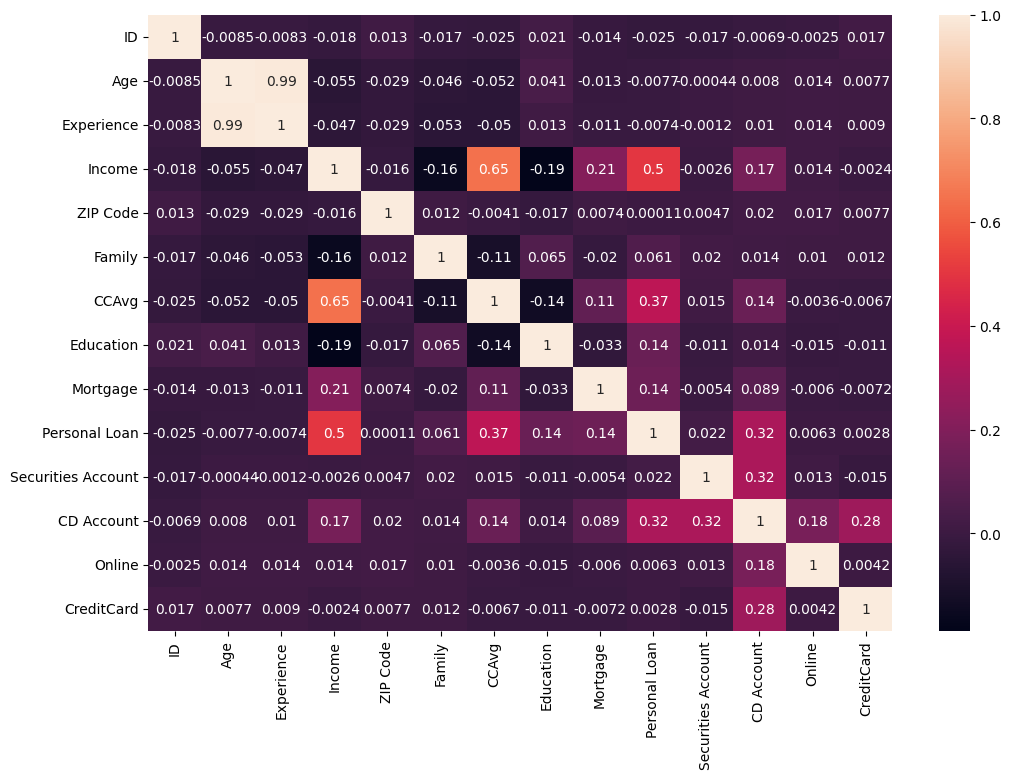

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(kaggle5.corr(), annot=True)

_________

Voy a ver el de marketing

In [11]:
import pandas as pd

marketing=pd.read_csv('./marketing/train.csv', sep= ';')
marketing

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
marketing['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [13]:
marketing['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [14]:
marketing['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [7]:
marketing['contact'].value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

In [15]:
marketing['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [16]:
marketing['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [17]:
marketing['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

_____

### PREDICCION DE CUANTO CREDITO PUEDO PEDIR DE LOAN AMOUNT EN FUNCION DE MI PATRIMONIO

In [6]:
df_credito= pd.read_csv('./5k_alberto/loan_approval_dataset.csv')
df_credito

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [5]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
import pandas as pd

# Supongamos que df es tu DataFrame actual
# Reemplaza esto con tu código actual para cargar o crear el DataFrame
# df = ...

# Obtén la lista de nombres de columnas
columns = df_credito.columns.tolist()

# Mueve 'income_annum' al final de la lista
columns.remove(' income_annum')
columns.append(' income_annum')

# Reorganiza el DataFrame con las columnas en el nuevo orden
df_credito = df_credito[columns]

# Muestra el DataFrame resultante
print(df_credito)


      loan_id   no_of_dependents      education  self_employed   loan_amount  \
0           1                  2       Graduate             No      29900000   
1           2                  0   Not Graduate            Yes      12200000   
2           3                  3       Graduate             No      29700000   
3           4                  3       Graduate             No      30700000   
4           5                  5   Not Graduate            Yes      24200000   
...       ...                ...            ...            ...           ...   
4264     4265                  5       Graduate            Yes       2300000   
4265     4266                  0   Not Graduate            Yes      11300000   
4266     4267                  2   Not Graduate             No      23900000   
4267     4268                  1   Not Graduate             No      12800000   
4268     4269                  1       Graduate             No      29700000   

       loan_term   cibil_score   reside

In [9]:
df_credito

,loan_id,no_of_dependents,education,self_employed,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,income_annum
0,1,2,Graduate,No,29900000,12,778,2400000,17600000,22700000,8000000,Approved,9600000
1,2,0,Not Graduate,Yes,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,4100000
2,3,3,Graduate,No,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,9100000
3,4,3,Graduate,No,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,8200000
4,5,5,Not Graduate,Yes,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,9800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,2300000,12,317,2800000,500000,3300000,800000,Rejected,1000000
4265,4266,0,Not Graduate,Yes,11300000,20,559,4200000,2900000,11000000,1900000,Approved,3300000
4266,4267,2,Not Graduate,No,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,6500000
4267,4268,1,Not Graduate,No,12800000,8,780,8200000,700000,14100000,5800000,Approved,4100000


In [ ]:
df[' loan_status']=df[' loan_status'].apply(lambda x: 1 if x == " Approved" else 0)